# Tipos de Dados

Além dos tipos de dados básicos, em análise de dados e estatística, frequentemente categorizamos dados com base em suas características:

*   **Dados Qualitativos (ou Categóricos):** Representam qualidades, categorias ou rótulos e não possuem um valor numérico inerente que possa ser medido de forma significativa. Podem ser divididos em:
    *   **Nominais:** Categorias sem ordem ou classificação natural. Exemplos: cor dos olhos (azul, verde, castanho), estado civil (solteiro, casado, divorciado).
    *   **Ordinais:** Categorias com uma ordem ou classificação natural. Exemplos: nível de escolaridade (fundamental, médio, superior), classificação de satisfação (muito insatisfeito, insatisfeito, neutro, satisfeito, muito satisfeito).

*   **Dados Quantitativos:** Representam quantidades que podem ser medidas numericamente. Podem ser divididos em:
    *   **Discretos:** Valores que só podem assumir números inteiros e geralmente resultam de contagens. Exemplos: número de filhos, número de carros em uma casa.
    *   **Contínuos:** Valores que podem assumir qualquer valor dentro de um intervalo e geralmente resultam de medições. Exemplos: altura, peso, temperatura.

Compreender a diferença entre esses tipos de dados é fundamental para escolher as técnicas de análise e visualização apropriadas.

#Pré-Processamento de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

In [ ]:
df = pd.read_csv('precipitacao_mensal.csv', sep = ";", index_col = "Data", parse_dates = True)
#df = pd.read_excel('precipitacao_mensal.csv', sep = ";", index_col = "Data", parse_dates = True)
df

,Precipitação
Data,
1956-01-31,"113,7"
1956-02-29,109
1956-03-31,"112,1"
1956-04-30,"188,5"
1956-05-31,"249,6"
...,...
2023-08-31,"144,1"
2023-09-30,"123,3"
2023-10-31,363


In [ ]:
df.dtypes

,0
Precipitação,object


In [ ]:
df.index.dtype

dtype('<M8[ns]')

In [ ]:
df.index

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Data', length=816, freq=None)

In [ ]:
df = df.rename(columns={'Precipitação': 'y'})
df

,y
Data,
1956-01-31,"113,7"
1956-02-29,109
1956-03-31,"112,1"
1956-04-30,"188,5"
1956-05-31,"249,6"
...,...
2023-08-31,"144,1"
2023-09-30,"123,3"
2023-10-31,363


In [ ]:
df = df.rename_axis('ds')
df

,y
ds,
1956-01-31,"113,7"
1956-02-29,109
1956-03-31,"112,1"
1956-04-30,"188,5"
1956-05-31,"249,6"
...,...
2023-08-31,"144,1"
2023-09-30,"123,3"
2023-10-31,363


In [ ]:
#Converte o campo para float e substitui a vírgula por ponto
df['y'] = df['y'].astype(str).str.replace(',', '.').astype(float)
display(df.head())

,y
ds,
1956-01-31,113.7
1956-02-29,109.0
1956-03-31,112.1
1956-04-30,188.5
1956-05-31,249.6


# Visualização

In [ ]:
fig = px.line(df, y='y', title='Precipitação Mensal ao longo do Tempo (Plotly)')
fig.show()

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

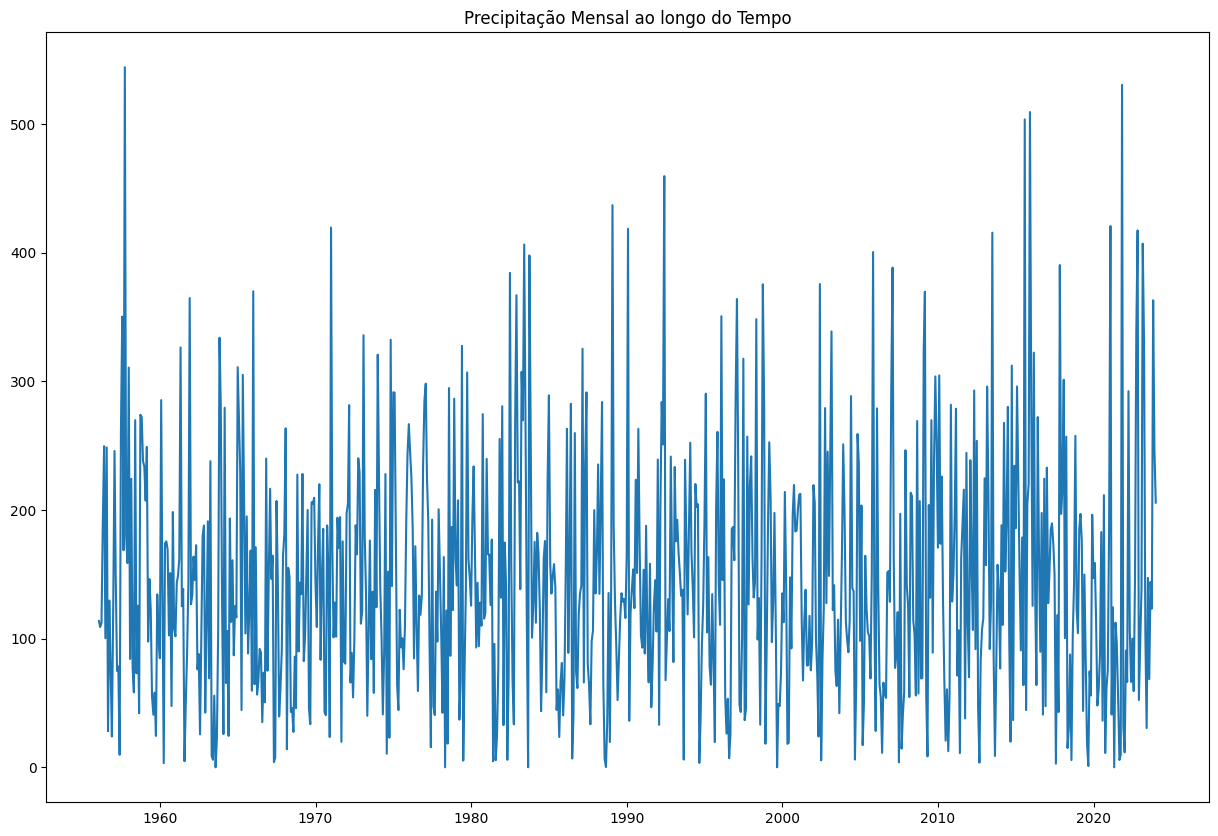

In [ ]:
plt.plot(df['y'])
plt.title('Precipitação Mensal ao longo do Tempo')
plt.show()

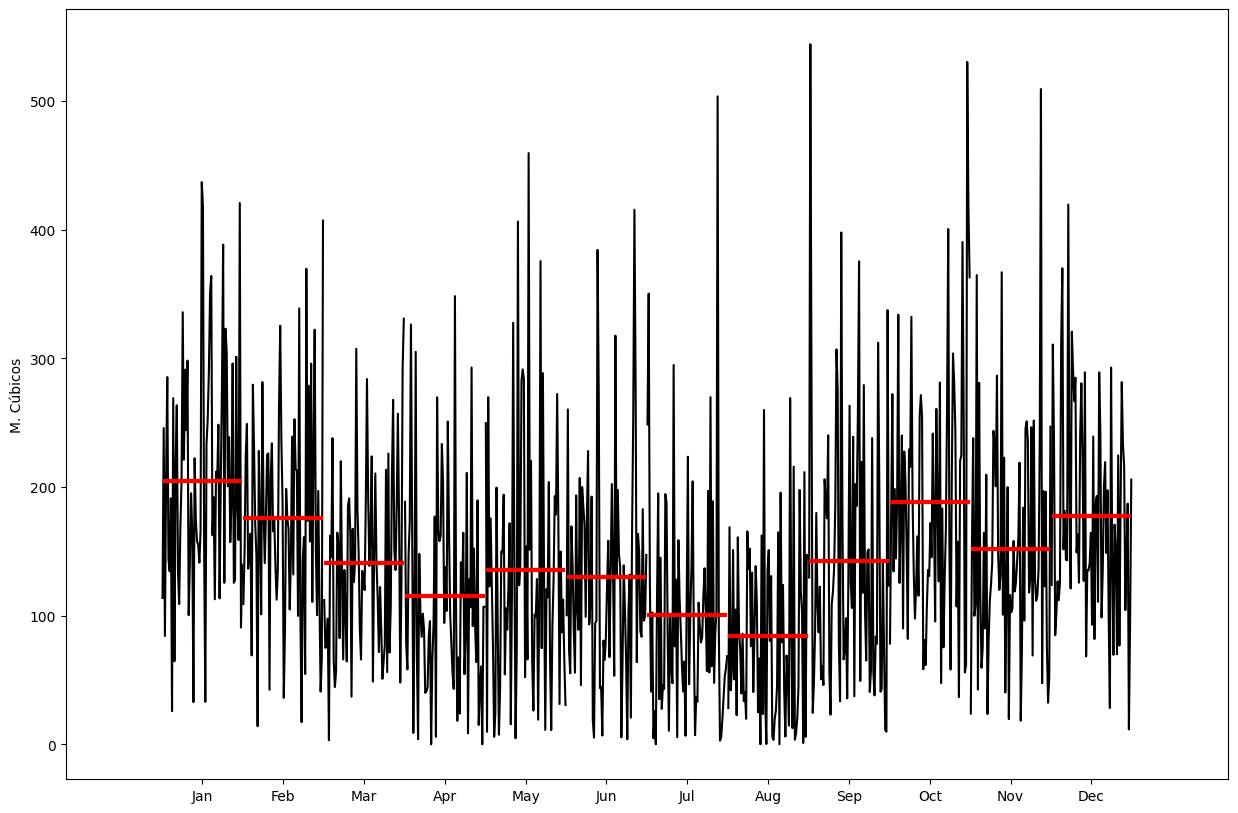

In [ ]:
# visualização da sazonalidade mensal
month_plot(df['y'].resample('ME').mean(),
           ylabel = 'M. Cúbicos')
plt.show()

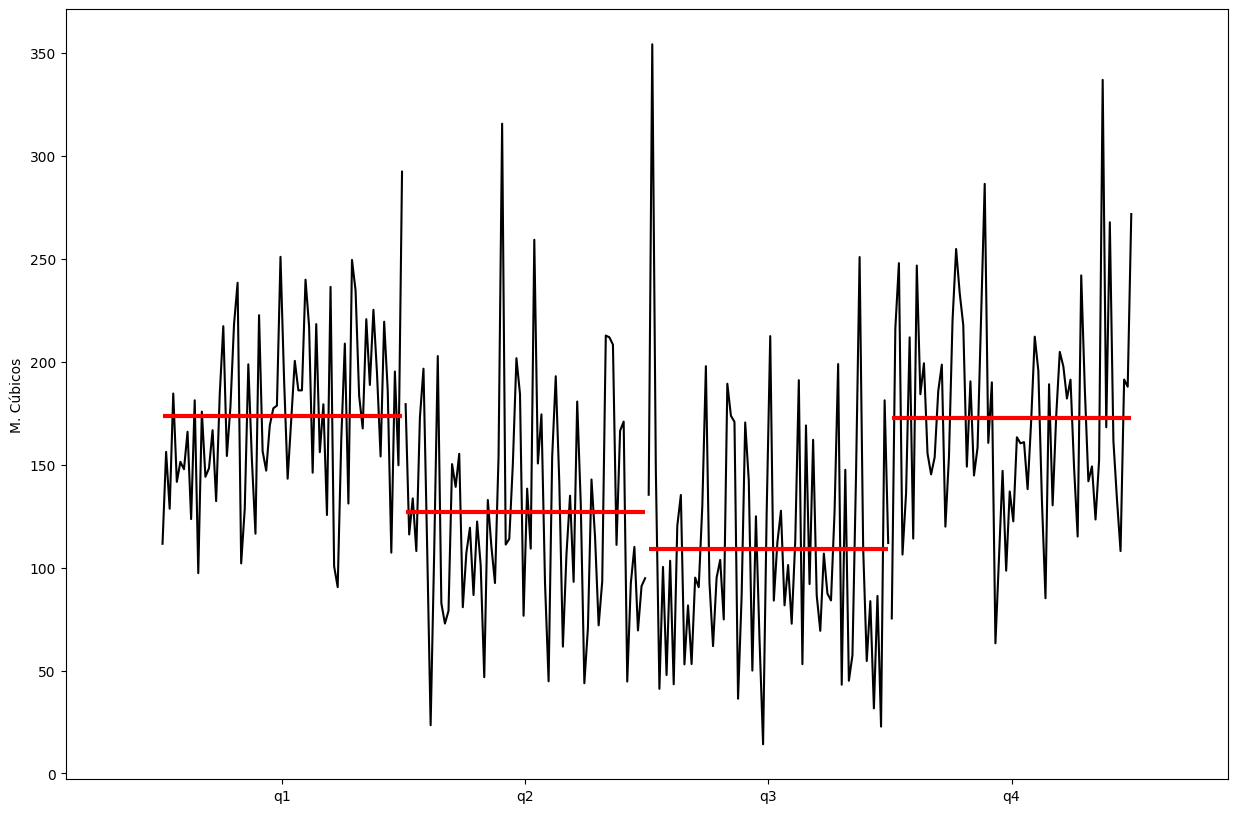

In [ ]:
# visualização da sazonalidade treimestral
quarter_plot(df['y'].resample('QE').mean(),
           ylabel = 'M. Cúbicos')
plt.show()

# Reamostragem

A list of commonly used frequency aliases:

Time-based frequencies:

    'D': Calendar day frequency
    'B': Business day frequency
    'W': Weekly frequency
    'W-MON', 'W-TUE', ..., 'W-SUN': Weekly frequency (anchored on a specific day)
    'M': Month end frequency
    'MS': Month start frequency
    'Q': Quarter end frequency
    'QS': Quarter start frequency
    'A' or 'Y': Year end frequency
    'BA' or 'BY': Business year end frequency
    'AS' or 'YS': Year start frequency
    'BAS' or 'BYS': Business year start frequency

Hourly, minutely, and secondly frequencies:

    'H': Hourly frequency
    'T' or 'min': Minutely frequency
    'S': Secondly frequency

You can also use multiples, like:

    '2D': Every 2 days
    '4H': Every 4 hours
    '15T' or '15min': Every 15 minutes



In [ ]:
res1 = df['y'].resample('QS').mean()
res1

,y
ds,
1956-01-01,111.600000
1956-04-01,179.466667
1956-07-01,135.433333
1956-10-01,75.333333
1957-01-01,156.266667
...,...
2022-10-01,187.933333
2023-01-01,292.433333
2023-04-01,94.866667


In [ ]:
res1 = df['y'].resample('QE').mean()
res1

,y
ds,
1956-03-31,111.600000
1956-06-30,179.466667
1956-09-30,135.433333
1956-12-31,75.333333
1957-03-31,156.266667
...,...
2022-12-31,187.933333
2023-03-31,292.433333
2023-06-30,94.866667


In [ ]:
fig = px.line(res1, y='y', title='Precipitação Mensal ao longo do Tempo (Trimestral)')
fig.show()

In [ ]:
# Resample the data to semi-annual frequency (end of June and December)
df_semiannual_jun = df['y'].resample('YE-JUN').mean()
df_semiannual_dec = df['y'].resample('YE').mean() # 'A' is equivalent to 'YE-DEC'
df_semiannual = pd.concat([df_semiannual_jun, df_semiannual_dec]).sort_index()
df_semiannual

,y
ds,
1956-06-30,145.533333
1956-12-31,125.458333
1957-06-30,120.791667
1957-12-31,210.775000
1958-06-30,208.250000
...,...
2022-06-30,113.750000
2022-12-31,152.516667
2023-06-30,189.141667


In [ ]:
fig = px.line(df_semiannual, y='y', title='Precipitação Mensal ao longo do Tempo (Semestral)')
fig.show()

In [ ]:
anual = df['y'].resample('YE').mean()
anual

,y
ds,
1956-12-31,125.458333
1957-12-31,210.775000
1958-12-31,164.375000
1959-12-31,110.041667
1960-12-31,137.775000
...,...
2019-12-31,110.800000
2020-12-31,102.933333
2021-12-31,119.758333


In [ ]:
fig = px.line(anual, y='y', title='Precipitação Mensal ao longo do Tempo (Anual)')
fig.show()

In [ ]:
# Calculate moving average with a window of 3 months
df_med3 = df['y'].rolling(window=3).mean()
df_med3

,y
ds,
1956-01-31,NaN
1956-02-29,NaN
1956-03-31,111.600000
1956-04-30,136.533333
1956-05-31,183.400000
...,...
2023-08-31,119.933333
2023-09-30,111.966667
2023-10-31,210.133333


In [ ]:
fig = px.line(df_med3, y='y', title='Precipitação Mensal ao longo do Tempo (Média Móvel 3 Meses)')
fig.show()

In [ ]:
# Calculate moving average with a window of 3 months
df['moving_average_3'] = df['y'].rolling(window=3).mean()

# Calculate moving average with a window of 6 months
df['moving_average_6'] = df['y'].rolling(window=6).mean()

# Calculate moving average with a window of 12 months
df['moving_average_12'] = df['y'].rolling(window=12).mean()

In [ ]:
display(df)

,y,moving_average_3,moving_average_6,moving_average_12
ds,,,,
1956-01-31,113.7,NaN,NaN,NaN
1956-02-29,109.0,NaN,NaN,NaN
1956-03-31,112.1,111.600000,NaN,NaN
1956-04-30,188.5,136.533333,NaN,NaN
1956-05-31,249.6,183.400000,NaN,NaN
...,...,...,...,...
2023-08-31,144.1,119.933333,138.000000,189.650000
2023-09-30,123.3,111.966667,103.416667,171.800000
2023-10-31,363.0,210.133333,146.100000,167.275000


In [ ]:
fig = px.line(df, y=['y', 'moving_average_3', 'moving_average_6', 'moving_average_12'],
              title='Precipitação Mensal com Médias Móveis')
fig.show()

In [ ]:
fig = px.line(df, y=['y', 'moving_average_3'],
              title='Precipitação Mensal com Médias Móveis')
fig.show()

In [ ]:
fig = px.line(df, y=['y', 'moving_average_6'],
              title='Precipitação Mensal com Médias Móveis')
fig.show()

In [ ]:
fig = px.line(df, y=['y', 'moving_average_12'],
              title='Precipitação Mensal com Médias Móveis')
fig.show()

# Métricas de Avaliação

## Método Hold-out para Séries Temporais

O método Hold-out, também conhecido como validação simples ou conjunto de teste fixo, é uma técnica fundamental para avaliar o desempenho de modelos preditivos, incluindo modelos de séries temporais. A ideia principal é dividir o conjunto de dados original em duas partes:

1.  **Conjunto de Treinamento:** Usado para treinar o modelo. O modelo aprende os padrões e relacionamentos nos dados históricos.
2.  **Conjunto de Teste (ou Hold-out Set):** Usado para avaliar o desempenho do modelo treinado em dados que ele "nunca viu" durante o treinamento.

Em séries temporais, a aplicação do método Hold-out deve respeitar a ordem cronológica dos dados. Isso significa que:

*   O conjunto de treinamento deve conter dados que ocorreram **antes** dos dados no conjunto de teste.
*   O conjunto de teste deve conter os dados mais **recentes**.

Uma divisão temporal típica seria usar os primeiros 80% dos dados para treinamento e os últimos 20% para teste.

**Por que usar Hold-out em Séries Temporais?**

*   **Simula a Previsão no Mundo Real:** Ao treinar em dados passados e testar em dados futuros, o Hold-out simula o cenário real de fazer previsões para o futuro com base em dados históricos.
*   **Avaliação Imparcial:** Garante que o desempenho do modelo seja avaliado em dados não utilizados durante o treinamento, fornecendo uma estimativa mais realista de como o modelo se comportará com novos dados.
*   **Simplicidade:** É um método conceitualmente simples e fácil de implementar.

**Limitações do Hold-out:**

*   **Sensibilidade à Divisão:** O desempenho da avaliação pode ser muito sensível à forma como a divisão entre treinamento e teste é feita, especialmente com conjuntos de dados menores.
*   **Uso Limitado de Dados:** Nem todos os dados são usados para treinamento, o que pode ser problemático com conjuntos de dados limitados.

Apesar das limitações, o método Hold-out é um passo importante na avaliação de modelos de séries temporais e geralmente é usado em conjunto com outras técnicas de validação, como a Validação Cruzada para Séries Temporais.

# Validação Cruzada para Séries Temporais

A Validação Cruzada é uma técnica comum para avaliar a performance de modelos, mas em Séries Temporais, ela precisa ser adaptada para respeitar a ordem cronológica dos dados. A Validação Cruzada tradicional (como K-Fold) divide os dados aleatoriamente em folds, o que não é adequado para dados de séries temporais, pois introduziria "vazamento de informação" do futuro para o passado.

A **Validação Cruzada para Séries Temporais (ou Time Series Cross-Validation)** aborda este problema dividindo os dados em múltiplos pares de conjuntos de treinamento e teste, onde cada conjunto de teste consiste em observações que ocorreram *após* as observações no conjunto de treinamento correspondente.

Existem algumas abordagens para a validação cruzada em séries temporais:

1.  **Forward Chaining (Encadeamento Progressivo):** Esta é a abordagem mais comum.
    *   Comece com um conjunto de treinamento inicial.
    *   Treine o modelo neste conjunto e avalie-o no próximo período de tempo (conjunto de teste inicial).
    *   Expanda o conjunto de treinamento para incluir o conjunto de teste anterior e o próximo ponto(s) de dados.
    *   Repita o processo de treinamento e avaliação nos períodos de teste subsequentes.

    Exemplo (com janelas crescentes):
    *   Treinar em [1], Testar em [2]
    *   Treinar em [1, 2], Testar em [3]
    *   Treinar em [1, 2, 3], Testar em [4]
    *   ... e assim por diante.

    Também é possível usar janelas deslizantes, onde o tamanho do conjunto de treinamento é fixo, mas a janela desliza para a frente no tempo.

**Por que usar Validação Cruzada em Séries Temporais?**

*   **Avaliação Mais Robusta:** Fornece uma estimativa mais robusta do desempenho do modelo em diferentes períodos de tempo, capturando como o modelo se comporta em diferentes condições.
*   **Melhor Uso dos Dados:** Utiliza mais dados para avaliação em comparação com o método Hold-out simples.
*   **Detecção de Instabilidade do Modelo:** Pode ajudar a identificar se o desempenho do modelo degrada ao longo do tempo.

**Limitações da Validação Cruzada para Séries Temporais:**

*   **Custo Computacional:** Pode ser computacionalmente mais caro do que o Hold-out, especialmente com conjuntos de dados grandes e muitos folds.
*   **Dependência entre Foldss:** Os folds não são independentes, pois os conjuntos de treinamento são aninhados ou sobrepostos.

A Validação Cruzada para Séries Temporais é uma técnica valiosa para obter uma avaliação mais confiável da performance de modelos de previsão, especialmente ao ajustar hiperparâmetros ou comparar diferentes arquiteturas de modelos.

## Erros
Em análise de séries temporais, o "erro" (ou resíduo) refere-se à diferença entre o valor real observado de um ponto na série temporal e o valor previsto ou modelado para esse mesmo ponto. Em outras palavras, é a parte da série temporal que o modelo não conseguiu explicar ou capturar.

Os erros são importantes por várias razões:

*   **Avaliação do Modelo:** A análise dos erros é crucial para avaliar o desempenho de um modelo de série temporal. Um bom modelo deve ter erros que são aleatórios, sem padrões discerníveis, e com média próxima de zero.
*   **Identificação de Padrões Não Capturados:** Se os erros apresentarem padrões (por exemplo, autocorreação, sazonalidade residual), isso indica que o modelo não capturou completamente esses padrões na série original, e pode ser necessário ajustar ou escolher um modelo diferente.
*   **Intervalos de Confiança:** Os erros são usados para calcular intervalos de confiança para previsões futuras. A variabilidade dos erros reflete a incerteza nas previsões.

Em resumo, os erros representam a variação não explicada na série temporal após a aplicação de um modelo e são uma ferramenta essencial para entender a adequação do modelo e a incerteza das previsões.

## Métricas de Erro

Existem várias métricas usadas para quantificar o erro entre os valores reais de uma série temporal e os valores previstos por um modelo. Algumas das mais comuns incluem:

*   **Erro Médio (ME - Mean Error):** A média dos erros. Um ME próximo de zero indica que não há viés nas previsões (o modelo não subestima nem superestima consistentemente os valores).

    Fórmula: $ME = \frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)$

*   **Erro Médio Absoluto (MAE - Mean Absolute Error):** A média dos valores absolutos dos erros. O MAE mede a magnitude média dos erros sem considerar sua direção. É menos sensível a outliers do que o MSE.

    Fórmula: $MAE = \frac{1}{n} \sum_{t=1}^{n} |y_t - \hat{y}_t|$

*   **Erro Quadrático Médio (MSE - Mean Squared Error):** A média dos erros ao quadrado. O MSE penaliza erros maiores mais significativamente do que erros menores.

    Fórmula: $MSE = \frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)^2$

*   **Raiz do Erro Quadrático Médio (RMSE - Root Mean Squared Error):** A raiz quadrada do MSE. O RMSE está na mesma unidade da série temporal original, tornando-o mais interpretável do que o MSE. Ele também penaliza erros maiores.

    Fórmula: $RMSE = \sqrt{\frac{1}{n} \sum_{t=1}^{n} (y_t - \hat{y}_t)^2}$

*   **Erro Percentual Absoluto Médio (MAPE - Mean Absolute Percentage Error):** A média dos erros percentuais absolutos. O MAPE é útil quando se deseja comparar a precisão de previsões entre séries temporais com diferentes escalas. No entanto, pode ser problemático com valores próximos de zero na série real.

    Fórmula: $MAPE = \frac{100}{n} \sum_{t=1}^{n} \left| \frac{y_t - \hat{y}_t}{y_t} \right|$

Onde:
* $y_t$ é o valor real observado no tempo $t$.
* $\hat{y}_t$ é o valor previsto pelo modelo no tempo $t$.
* $n$ é o número de observações.
* $y_{t-1}$ é o valor real observado no tempo $t-1$.

A escolha da métrica de erro depende do contexto específico e do que se deseja otimizar nas previsões.

O termo $\frac{1}{n}$ que aparece em várias das fórmulas das métricas de erro (como ME, MAE, MSE e MAPE) representa a **média**.

*   **n:** É o número total de observações ou pontos de dados na série temporal que estão sendo considerados no cálculo do erro.
*   **$\sum$ (Sigma maiúsculo):** Representa a soma.
*   **$\sum_{t=1}^{n}$:** Indica que estamos somando os valores para cada ponto no tempo, de $t=1$ (o primeiro ponto) até $t=n$ (o último ponto).

Portanto, multiplicar a soma dos erros (ou erros absolutos, ou erros quadráticos, etc.) por $\frac{1}{n}$ é o mesmo que dividir essa soma por $n$, o que resulta na **média** desses erros ao longo de toda a série temporal. Isso nos dá uma medida agregada do desempenho do modelo sobre o conjunto de dados.

# Média Móvel

## Média Móvel Anual (Janela 12)

A média móvel anual com uma janela de 12 meses suaviza a série temporal, destacando tendências de longo prazo e removendo flutuações sazonais de curto prazo. Para cada ponto no tempo, a média móvel de 12 meses é calculada como a média dos 12 valores anteriores na série.

Por exemplo, a média móvel de 12 meses para janeiro de 1957 seria a média da precipitação de fevereiro de 1956 a janeiro de 1957. Para fevereiro de 1957, seria a média de março de 1956 a fevereiro de 1957, e assim por diante.

No código, a função `rolling(window=12).mean()` do pandas realiza este cálculo automaticamente. Ela aplica uma janela deslizante de 12 períodos sobre a coluna 'y' e calcula a média para cada janela. Os primeiros 11 valores na série resultante serão `NaN` porque não há 12 valores anteriores para calcular a média.